In [49]:
%matplotlib inline
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Reults is a dict of false positive reates, 
# indexed as 
#   - results[(FILE_NAME, alpha)][CLASSIFIER_NAME] = (g0_fp_true, g1_fp_true, g0_fp_true, g1_fp_opti)

alphas    = [1, 0.5, 0.3, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
f_names   = ['Outputs/adult.pickle', 'Outputs/recidivism.pickle', 'Outputs/lawschool.pickle', 'Outputs/student.pickle']
clf_names = ['GB_base' ,'SV_base' ,'LG_base' ,'GB_equal' ,'SV_equal' ,'LG_equal' ,'LR_0.2' ,'LR_0.1', 'LR_0.01' ,'DT_0.2', 'DT_0.1' ,'DT_0.01']

real_clf_names = {'GB_base': "Gradient Boosting \n(base)" ,'SV_base': "SVM \n(Base)" ,'LG_base': "Logistic Regression\n(base)",
                  'GB_equal': "Gradient Boosting \n(equal representation)" ,'SV_equal': "SVM \n(equal representation)"  ,'LG_equal': 'Logistic Regression \n(equal representation)', 'LR_0.2': 'Linear \n(gamma=0.2)' ,'LR_0.1': 'Linear \n(gamma=0.1)', 'LR_0.01':'Linear \n(gamma=0.01)' ,'DT_0.2': 'Decision Tree \n(gamma=0.2)', 'DT_0.1': 'Decision Tree \n(gamma=0.1)','DT_0.01': 'Decision Tree \n(gamma=0.01)'}


names = ['Income', 'Recidivism', 'Law Schol', 'Students']

results = pkl.load(open('Outputs/false_postive_results.pickle', 'rb'))

In [51]:
for file_name in f_names:
    for alpha in alphas:
        for clf_name in clf_names:
            print(results[(file_name, alpha)][clf_name])

(0.07076190476190476, 0.19533116814161494, 0.07076190476190476, 0.19533116814161494)
(0.07876190476190476, 0.25827534167898547, 0.07876190476190476, 0.25827534167898547)
(0.07876190476190476, 0.23080666987195722, 0.07876190476190476, 0.24976646861997231)
(0.024, 0.17400618344654284, 0.024, 0.20121577071924934)
(0.13238375350140055, 0.3337818572231789, 0.13238375350140055, 0.3337818572231789)
(0.12405042016806722, 0.30995243942449513, 0.12405042016806722, 0.3135669847041439)
(0.10461904761904761, 0.26661019828495397, 0.10461904761904761, 0.2808872359121388)
(0.10461904761904761, 0.26661019828495397, 0.10461904761904761, 0.2808872359121388)
(0.10461904761904761, 0.26661019828495397, 0.10461904761904761, 0.2808872359121388)
(0.12405042016806722, 0.3172279696208796, 0.12405042016806722, 0.3301599225601938)
(0.1065266106442577, 0.32897334711328846, 0.1065266106442577, 0.3372902002193667)
(0.13238375350140055, 0.3266131260164628, 0.13238375350140055, 0.3266131260164628)
(0.07076190476190476,

0.0
0.0
0.0
0.0
0.024999999999999994
0.0


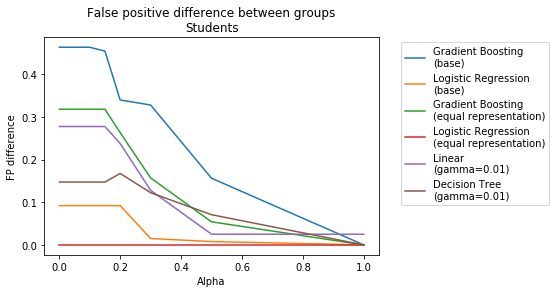

In [52]:
i = 3

f_name = f_names[i]
for clf in ['GB_base', 'LG_base' ,'GB_equal' ,'LG_equal' ,'LR_0.01','DT_0.01']:
    x = alphas
    y = [abs(abs(results[(f_name, alpha)][clf][0] - results[(f_name, alpha)][clf][1]) 
         - abs(results[(f_name, alpha)][clf][2] - results[(f_name, alpha)][clf][3]))
                for alpha in alphas]
    print(min(y))
    plt.plot(x, y, label=real_clf_names[clf])
plt.title('False positive difference between groups\n' + names[i])
plt.xlabel('Alpha')
plt.ylabel("FP difference")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
for file_name in file_names: